# IMPORTS

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

## Data

In [2]:
from novelty_detection.data import load_data
from novelty_detection.preprocessing import *

df = load_data("gaia_data_0.csv", header_names=None)
df_date = convert_df_time_column_to_datetime(df)
df_index = convert_df_to_df_with_datetime_index(df_date)
print(df_index.shape)
df_index.head()

(2520, 12)


,T_ext,Solar_irrad,T_imp,BC1_power,BC2_power,Refr1_power,Refr2_power,BC1_flow,BC2_flow,Refr1_flow,Refr2_flow,T_ret
datetime,,,,,,,,,,,,
2022-05-13 12:00:00+00:00,24.400000,874.0,9.880005,3.05,16.50,15.70,0.25,2923.0,2476.0,0.0,3153.0,10.869995
2022-05-13 12:02:00+00:00,24.350000,875.0,9.940002,3.10,16.40,15.75,0.30,2793.0,2476.0,0.0,3211.0,10.750000
2022-05-13 12:04:00+00:00,24.510000,875.0,9.940002,3.05,16.40,15.55,0.25,2779.0,2505.0,0.0,3196.0,10.899994
2022-05-13 12:06:00+00:00,24.629999,870.0,9.990021,3.10,16.45,15.65,0.30,2808.0,2491.0,0.0,3340.0,10.809998
2022-05-13 12:08:00+00:00,24.570000,868.0,10.140015,3.10,16.65,15.80,0.25,2750.0,2476.0,0.0,3355.0,10.950012


# CORRELATION PLOT

The last column of the correlation matrix corresponds to the corralations between T_ret and the other variables

In [21]:
correaltions = df_index.corr(method='pearson').iloc[:-1,-1]
d_correlations = correaltions.to_dict()
d_correlations

{'T_ext': -0.03584300840508007,
 'Solar_irrad': -0.14952951462938513,
 'T_imp': 0.9974715502166827,
 'BC1_power': -0.552265699266819,
 'BC2_power': -0.6463166111557884,
 'Refr1_power': -0.6358027468130173,
 'Refr2_power': 0.15948597279994586,
 'BC1_flow': -0.7146313012333704,
 'BC2_flow': -0.7144705839941746,
 'Refr1_flow': -0.0010416173831446762,
 'Refr2_flow': -0.7160516072392216}

In [49]:
columns = ['T_ext', 'Solar_irrad', 'T_imp', 
           'BC1_power', 'BC2_power', 'Refr1_power', 
           'Refr2_power', 'BC1_flow', 'BC2_flow', 
           'Refr1_flow', 'Refr2_flow']

list_of_dict = []

for shift in range(500):
    df_copy=df_index.copy()
    df_copy[columns] = df_copy[columns].shift(shift)
    df_remove = df_copy.iloc[shift:]
    correaltions = df_remove.corr(method='pearson').iloc[:,-1]
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))

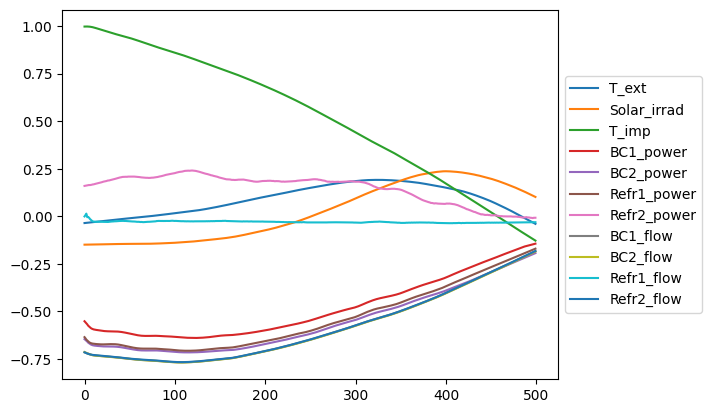

In [50]:
fig, ax = plt.subplots()
df_corr[columns].plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# FREQUENCY PLOT